In [250]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import calendar

In [251]:
chicago_dataset = pd.read_csv('Chicago_Airline_Data.csv')
chicago_dataset = chicago_dataset.dropna(how='any')

In [252]:
chicago_dataset.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2010,1,9E,Pinnacle Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",126.0,27.0,9.13,0.00,...,0.00,7.06,3.0,0.0,1603.0,731.0,0.0,335.0,0.0,537.0
1,2010,1,AA,American Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",4988.0,711.0,162.66,26.90,...,1.00,179.17,164.0,8.0,35392.0,11260.0,1656.0,11677.0,37.0,10762.0
2,2010,1,AS,Alaska Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",121.0,53.0,7.61,1.22,...,0.00,0.23,1.0,0.0,2192.0,427.0,70.0,1688.0,0.0,7.0
3,2010,1,B6,JetBlue Airways,ORD,"Chicago, IL: Chicago O'Hare International",155.0,34.0,8.12,0.38,...,0.00,4.83,2.0,1.0,1659.0,373.0,8.0,859.0,0.0,419.0
4,2010,1,CO,Continental Air Lines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",326.0,53.0,19.48,1.26,...,3.42,9.78,3.0,0.0,2322.0,1016.0,66.0,762.0,62.0,416.0


In [253]:
chicago_dataset.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000
mean,2013.875000,6.463608,2126.933544,433.833070,83.545791,11.689106,179.187081,0.418354,158.992872,61.140823,5.332278,30271.647152,7084.655063,1249.725475,10503.600475,20.268987,11413.397152
std,2.656093,3.454984,2306.811459,505.532592,95.578619,16.813493,207.508047,0.841933,212.905895,112.270164,9.366406,37772.207981,9213.306389,2142.453496,13142.326262,59.422961,15631.244213
min,2010.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,3.000000,206.000000,53.000000,13.532500,1.000000,22.797500,0.000000,10.440000,1.000000,0.000000,3388.750000,841.750000,50.750000,1264.250000,0.000000,664.750000
50%,2014.000000,6.000000,700.500000,151.500000,35.320000,4.535000,75.635000,0.000000,35.900000,15.000000,2.000000,10094.000000,2256.500000,376.000000,4567.500000,0.000000,2857.000000
75%,2016.000000,9.000000,4369.750000,765.250000,149.085000,14.960000,294.450000,0.542500,265.437500,76.000000,6.000000,49302.000000,11997.500000,1510.500000,15627.750000,16.000000,18371.500000
max,2018.000000,12.000000,8190.000000,2522.000000,560.030000,115.740000,1140.530000,5.610000,1431.690000,1312.000000,90.000000,218222.000000,56344.000000,24442.000000,81299.000000,967.000000,107204.000000


In [254]:
chicago_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264 entries, 0 to 1265
Data columns (total 21 columns):
year                   1264 non-null int64
 month                 1264 non-null int64
carrier                1264 non-null object
carrier_name           1264 non-null object
airport                1264 non-null object
airport_name           1264 non-null object
arr_flights            1264 non-null float64
arr_del15              1264 non-null float64
carrier_ct             1264 non-null float64
weather_ct             1264 non-null float64
nas_ct                 1264 non-null float64
security_ct            1264 non-null float64
late_aircraft_ct       1264 non-null float64
arr_cancelled          1264 non-null float64
arr_diverted           1264 non-null float64
arr_delay              1264 non-null float64
carrier_delay          1264 non-null float64
weather_delay          1264 non-null float64
nas_delay              1264 non-null float64
security_delay         1264 non-null float64
l

In [255]:
chicago_dataset.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [256]:
chicago_dataset = chicago_dataset.rename(columns={' month':'month', ' weather_ct':'weather_ct', ' arr_delay':'arr_delay', ' carrier_delay':'carrier_delay'})

In [257]:
def to_month_name (month_index):
    month = calendar.month_abbr[month_index]
    return month
        
chicago_dataset['month_name'] = chicago_dataset['month'].apply(to_month_name)

In [258]:
chicago_dataset = chicago_dataset[chicago_dataset['year'] != 2019]

In [259]:
def agg_group_df(df, group, agg_field, fields):
    flight_df = pd.DataFrame(df.groupby(by=group)[fields].sum())
    flight_df[agg_field] = flight_df.apply(lambda row: sum(row[fields]), axis = 1)
    return flight_df

In [260]:
AGG_FLIGHT_FIELDS = ['arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted']
TOTAL_FLIGHT_FIELDS = 'total_flights'

year_grouped_df = agg_group_df(chicago_dataset, ['year'], TOTAL_FLIGHT_FIELDS, AGG_FLIGHT_FIELDS)
year_grouped_df

,arr_flights,arr_del15,arr_cancelled,arr_diverted,total_flights
year,,,,,
2010,313411.0,59755.0,8443.0,845.0,382454.0
2011,313759.0,63815.0,12494.0,615.0,390683.0
2012,310643.0,55826.0,6814.0,640.0,373923.0
2013,306532.0,70470.0,9999.0,709.0,387710.0
2014,287377.0,77824.0,14355.0,831.0,380387.0
2015,313514.0,62123.0,9350.0,794.0,385781.0
2016,243889.0,44845.0,4300.0,595.0,293629.0
2017,266377.0,46519.0,3907.0,670.0,317473.0
2018,332942.0,67188.0,7620.0,1041.0,408791.0


In [261]:
year_grouped_df = chicago_dataset.groupby(by='year')
year_grouped_df = pd.DataFrame(year_grouped_df[['arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted']].sum())

year_grouped_df['total_flights'] = year_grouped_df['arr_flights']+ year_grouped_df['arr_del15']+ year_grouped_df['arr_cancelled']+ year_grouped_df['arr_diverted']

year_grouped_df

,arr_flights,arr_del15,arr_cancelled,arr_diverted,total_flights
year,,,,,
2010,313411.0,59755.0,8443.0,845.0,382454.0
2011,313759.0,63815.0,12494.0,615.0,390683.0
2012,310643.0,55826.0,6814.0,640.0,373923.0
2013,306532.0,70470.0,9999.0,709.0,387710.0
2014,287377.0,77824.0,14355.0,831.0,380387.0
2015,313514.0,62123.0,9350.0,794.0,385781.0
2016,243889.0,44845.0,4300.0,595.0,293629.0
2017,266377.0,46519.0,3907.0,670.0,317473.0
2018,332942.0,67188.0,7620.0,1041.0,408791.0


In [262]:
year_grouped_df.index

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype='int64', name='year')

In [263]:
year_grouped_df.columns

Index(['arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted',
       'total_flights'],
      dtype='object')

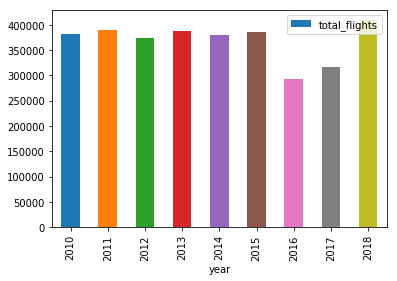

In [264]:
year_grouped_df['total_flights'].plot.bar()
plt.legend(loc = 'best')

In [265]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [266]:
month_grouped_df = agg_group_df(chicago_dataset, [ 'month'], TOTAL_FLIGHT_FIELDS, AGG_FLIGHT_FIELDS)
month_grouped_df

,arr_flights,arr_del15,arr_cancelled,arr_diverted,total_flights
month,,,,,
1,206099.0,44661.0,9777.0,216.0,260753.0
2,193401.0,41986.0,11317.0,350.0,247054.0
3,223121.0,41798.0,5296.0,294.0,270509.0
4,220794.0,42154.0,5279.0,439.0,268666.0
5,232291.0,49881.0,6546.0,1071.0,289789.0
6,237311.0,61169.0,9032.0,1127.0,308639.0
7,243593.0,57126.0,6223.0,791.0,307733.0
8,244324.0,53182.0,5802.0,1032.0,304340.0
9,225537.0,35939.0,4455.0,444.0,266375.0


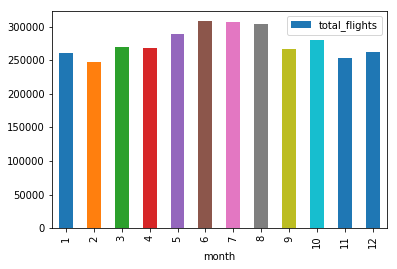

In [267]:
month_grouped_df['total_flights'].plot.bar()
plt.legend(loc = 'best')

In [268]:
chicago_dataset.head(14)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,month_name
0,2010,1,9E,Pinnacle Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",126.0,27.0,9.13,0.00,...,7.06,3.0,0.0,1603.0,731.0,0.0,335.0,0.0,537.0,Jan
1,2010,1,AA,American Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",4988.0,711.0,162.66,26.90,...,179.17,164.0,8.0,35392.0,11260.0,1656.0,11677.0,37.0,10762.0,Jan
2,2010,1,AS,Alaska Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",121.0,53.0,7.61,1.22,...,0.23,1.0,0.0,2192.0,427.0,70.0,1688.0,0.0,7.0,Jan
3,2010,1,B6,JetBlue Airways,ORD,"Chicago, IL: Chicago O'Hare International",155.0,34.0,8.12,0.38,...,4.83,2.0,1.0,1659.0,373.0,8.0,859.0,0.0,419.0,Jan
4,2010,1,CO,Continental Air Lines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",326.0,53.0,19.48,1.26,...,9.78,3.0,0.0,2322.0,1016.0,66.0,762.0,62.0,416.0,Jan
5,2010,1,DL,Delta Air Lines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",517.0,98.0,37.13,7.63,...,12.76,11.0,0.0,4597.0,1586.0,1042.0,1235.0,0.0,734.0,Jan
6,2010,1,EV,Atlantic Southeast Airlines,ORD,"Chicago, IL: Chicago O'Hare International",29.0,6.0,3.14,0.47,...,1.00,2.0,0.0,200.0,87.0,16.0,42.0,0.0,55.0,Jan
7,2010,1,MQ,American Eagle Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",6598.0,1697.0,214.32,52.49,...,777.57,299.0,2.0,99273.0,23662.0,4770.0,26102.0,4.0,44735.0,Jan
8,2010,1,OH,Comair Inc.,ORD,"Chicago, IL: Chicago O'Hare International",145.0,27.0,13.72,3.76,...,1.00,7.0,0.0,1685.0,964.0,368.0,337.0,0.0,16.0,Jan
9,2010,1,OO,SkyWest Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",4197.0,1102.0,109.61,14.96,...,480.57,176.0,2.0,56570.0,6806.0,1380.0,20984.0,27.0,27373.0,Jan


In [269]:
carrier_years_df = agg_group_df(chicago_dataset, [ 'year', 'carrier_name'], TOTAL_FLIGHTS_FIELD, FLIGHTS_AGGR_FIELDS)
carrier_years_df

arr_flights  arr_del15  arr_cancelled  \
year carrier_name                                                          
2010 Alaska Airlines Inc.               1785.0      389.0            5.0   
     American Airlines Inc.            56476.0    11051.0         1106.0   
     American Eagle Airlines Inc.      79858.0    16996.0         2679.0   
     Atlantic Southeast Airlines        3581.0      811.0          155.0   
     Comair Inc.                        2292.0      735.0          111.0   
     Continental Air Lines Inc.         4641.0      965.0           55.0   
     Delta Air Lines Inc.               5412.0     1464.0          147.0   
     ExpressJet Airlines Inc.          28458.0     5270.0          823.0   
     JetBlue Airways                    2186.0      565.0           46.0   
     Mesa Airlines Inc.                13963.0     2538.0          501.0   
     Pinnacle Airlines Inc.              801.0      205.0           33.0   
     SkyWest Airlines Inc.             42666.0     8975.0         1334.0   
     US Airways Inc.                    7018.0     1578.0          106.0   
     United Air Lines Inc.             64274.0     8213.0         1342.0   
2011 Alaska Airlines Inc.               1744.0      262.0           12.0   
     American Airlines Inc.            53957.0    10776.0         1836.0   
     American Eagle Airlines Inc.      83600.0    17259.0         4344.0   
     Atlantic Southeast Airlines        5611.0     1472.0          298.0   
     Continental Air Lines Inc.         7756.0     2214.0          145.0   
     Delta Air Lines Inc.               6019.0     1299.0          120.0   
     ExpressJet Airlines Inc.          48476.0     9959.0         2400.0   
     JetBlue Airways                    2383.0      707.0           49.0   
     Mesa Airlines Inc.                 9899.0     1615.0          380.0   
     SkyWest Airlines Inc.             29887.0     6336.0         1341.0   
     US Airways Inc.                    7173.0     1796.0          160.0   
     United Air Lines Inc.             57254.0    10120.0         1409.0   
2012 Alaska Airlines Inc.               1708.0      215.0            5.0   
     American Airlines Inc.            50360.0     9374.0          882.0   
     American Eagle Airlines Inc.      82995.0    12245.0         1974.0   
     Delta Air Lines Inc.               6119.0     1019.0           31.0   
...                                        ...        ...            ...   
2016 Frontier Airlines Inc.             4600.0      995.0           42.0   
     JetBlue Airways                    2425.0      572.0           28.0   
     SkyWest Airlines Inc.             41668.0     7824.0         1064.0   
     Spirit Air Lines                  10596.0     2532.0          258.0   
     United Air Lines Inc.             70729.0    11611.0          752.0   
     Virgin America                     1510.0      356.0            8.0   
2017 Alaska Airlines Inc.               2082.0      292.0            9.0   
     American Airlines Inc.            63732.0    11041.0          756.0   
     Delta Air Lines Inc.               7785.0     1174.0           55.0   
     ExpressJet Airlines Inc.          23953.0     3718.0          522.0   
     Frontier Airlines Inc.             3108.0      621.0           22.0   
     JetBlue Airways                    2421.0      735.0           56.0   
     SkyWest Airlines Inc.             78371.0    16324.0         1658.0   
     Spirit Air Lines                   9930.0     2031.0          310.0   
     United Air Lines Inc.             73499.0    10227.0          516.0   
     Virgin America                     1496.0      356.0            3.0   
2018 Alaska Airlines Inc.               3162.0      661.0           16.0   
     American Airlines Inc.            63906.0    12157.0         1202.0   
     Delta Air Lines Inc.               9358.0     1820.0           36.0   
     Endeavor Air Inc.                  1878.0      435.0           59.0   
     En

In [270]:
# airlines performance over the years:
airlines_df = carrier_years_df.pivot_table(index='carrier_name', columns='year')['total_flights']
airlines_df = airlines_df.dropna(how='any')
airlines_df

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
carrier_name,,,,,,,,,
Alaska Airlines Inc.,2186.0,2023.0,1930.0,1876.0,2085.0,2196.0,2313.0,2385.0,3853.0
American Airlines Inc.,68834.0,66719.0,60789.0,62805.0,62564.0,66834.0,75626.0,75689.0,77494.0
Delta Air Lines Inc.,7033.0,7447.0,7185.0,7622.0,8095.0,9023.0,8883.0,9034.0,11243.0
ExpressJet Airlines Inc.,34642.0,60919.0,73927.0,75189.0,71166.0,58552.0,48940.0,28293.0,12350.0
JetBlue Airways,2807.0,3141.0,2377.0,2546.0,3044.0,3178.0,3034.0,3219.0,3523.0
SkyWest Airlines Inc.,53044.0,37602.0,32471.0,34964.0,51218.0,52478.0,50648.0,96511.0,91684.0
United Air Lines Inc.,73998.0,68883.0,75906.0,71516.0,73454.0,79506.0,83264.0,84441.0,92393.0


In [271]:
len(airlines_df.index)

7

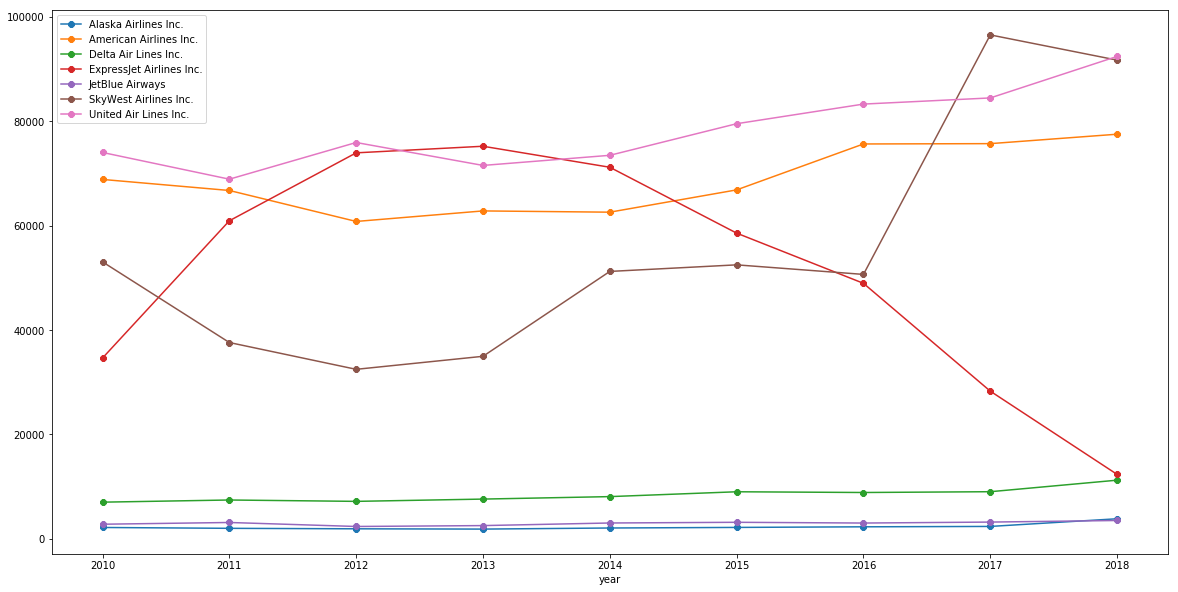

In [272]:
fig, ax = plt.subplots(figsize=(20, 10))
x_axis = [year for year in airlines_df]

num_of_plots = len(airlines_df.index)
colormap = plt.cm.tab10

for index in airlines_df.index.values:
    airlines_df.loc[index,:].plot(kind='line', marker="8", linestyle='-')
    
plt.legend(loc='best')
plt.show()

In [273]:
# Airline percentages
ontime_perc_df = (carrier_years_df['arr_flights'] / carrier_years_df['total_flights']) * 100
ontime_perc_df = pd.DataFrame(ontime_perc_df)

ontime_perc_df = ontime_perc_df.pivot_table(index='carrier_name', columns='year')

ontime_perc_df = ontime_perc_df.dropna(how='any')[0]
ontime_perc_df

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
carrier_name,,,,,,,,,
Alaska Airlines Inc.,81.655993,86.208601,88.497409,86.780384,82.206235,87.841530,87.505404,87.295597,82.065923
American Airlines Inc.,82.046663,80.872015,82.843936,82.058753,78.529186,83.560762,81.985032,84.202460,82.465739
Delta Air Lines Inc.,76.951514,80.824493,85.163535,83.167148,80.210006,84.827663,85.703028,86.174452,83.234012
ExpressJet Airlines Inc.,82.148837,79.574517,80.855438,75.862161,73.672821,81.968165,83.208010,84.660517,79.352227
JetBlue Airways,77.876737,75.867558,80.774085,74.980361,77.398160,77.438641,79.927488,75.209692,72.353108
SkyWest Airlines Inc.,80.435110,79.482474,83.588433,78.480723,72.917724,79.844887,82.269784,81.204215,78.937437
United Air Lines Inc.,86.859104,83.117750,81.687877,81.530007,78.872492,82.490630,84.945475,87.041840,83.621054


In [274]:
x_axis = [year for year in ontime_perc_df]
x_axis
ontime_perc_df.index.values

array(['Alaska Airlines Inc.', 'American Airlines Inc.',
       'Delta Air Lines Inc.', 'ExpressJet Airlines Inc.',
       'JetBlue Airways', 'SkyWest Airlines Inc.',
       'United Air Lines Inc.'], dtype=object)

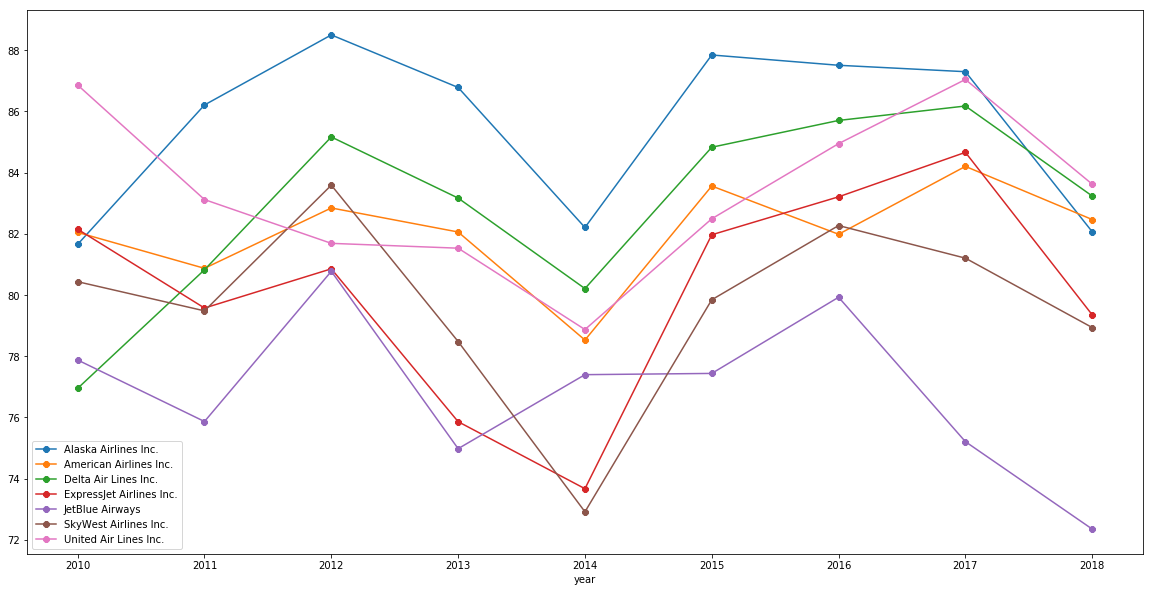

In [276]:
fig, ax = plt.subplots(figsize=(20, 10))
x_axis = [year for year in ontime_perc_df]

num_of_plots = len(airlines_df.index)
colormap = plt.cm.tab10

for airline in ontime_perc_df.index.values:
    ontime_arr_pct.loc[airline,:].plot(kind='line', marker="8", linestyle='-')
    
plt.legend(loc='best')

In [277]:
num_delays_file = "Total_Delays_Chicago.csv"

In [278]:
total_delays_df = pd.read_csv("Total_Delays_Chicago.csv")
total_delays_df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
0,2010,1,9E,Pinnacle Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",126.0,27.0,9.13,0.00,10.81,0.00,7.06,3.0,0.0
1,2010,1,AA,American Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",4988.0,711.0,162.66,26.90,341.27,1.00,179.17,164.0,8.0
2,2010,1,AS,Alaska Airlines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",121.0,53.0,7.61,1.22,43.94,0.00,0.23,1.0,0.0
3,2010,1,B6,JetBlue Airways,ORD,"Chicago, IL: Chicago O'Hare International",155.0,34.0,8.12,0.38,20.67,0.00,4.83,2.0,1.0
4,2010,1,CO,Continental Air Lines Inc.,ORD,"Chicago, IL: Chicago O'Hare International",326.0,53.0,19.48,1.26,19.06,3.42,9.78,3.0,0.0


In [279]:
# Run basic statistical calculations.
faulty_carrier = total_delays_df["carrier_ct"].sum()
poor_weather = total_delays_df["weather_ct"].sum()
national_avat_sys = total_delays_df["nas_ct"].sum()
security_issues = total_delays_df["security_ct"].sum()
late_arrival = total_delays_df["late_aircraft_ct"].sum()

In [280]:
# Create a summary data frame to hold results.
delay_count_df = [{"Faulty Carrier": faulty_carrier, "Poor Weather": poor_weather, 
                 "NAS": national_avat_sys, "Security Issues": security_issues, "Late Arrivals": late_arrival}]

In [281]:
delay_count_df = pd.DataFrame(data = delay_count_df, columns=["Faulty Carrier", "Poor Weather", 
                                                 "NAS", "Security Issues", "Late Arrivals"])
delay_count_df

,Faulty Carrier,Poor Weather,NAS,Security Issues,Late Arrivals
0,105601.88,14775.03,226492.47,528.8,200966.99


In [282]:
# Label the characteristics for the pie chart.
labels = ["Faulty Carrier", "Poor Weather", "NAS", "Security Issues", "Late Arrivals"]
sizes = [faulty_carrier, poor_weather, national_avat_sys, security_issues, late_arrival]
colors = ["red", "orange", "lightcoral", "lightskyblue"]
explode = (0.1, 0, 0, 0, 0)

([<matplotlib.patches.Wedge at 0x1ab16f37cf8>,
 [Text(-1.1947990723300246, 0.11160276322436158, 'Faulty Carrier'),
  Text(-0.9100348373375511, -0.6179292797982768, 'Poor Weather'),
  Text(0.4363842481782754, -1.0097369894887884, 'NAS'),
  Text(1.0895809328041623, 0.1510410237968858, 'Security Issues'),
  Text(0.3025941148265225, 1.0575617247576397, 'Late Arrivals')],
 [Text(-0.6969661255258477, 0.06510161188087758, '19.3%'),
  Text(-0.4963826385477551, -0.33705233443542365, '2.7%'),
  Text(0.23802777173360476, -0.5507656306302481, '41.3%'),
  Text(0.594316872438634, 0.08238601298011952, '0.1%'),
  Text(0.16505133535992134, 0.5768518498678034, '36.6%')])

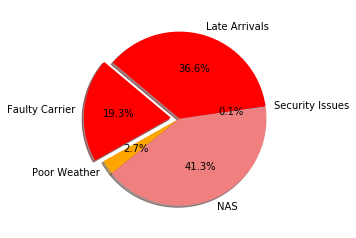

In [283]:
# Create pie chart.
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [284]:
delay_count_df.columns

Index(['Faulty Carrier', 'Poor Weather', 'NAS', 'Security Issues',
       'Late Arrivals'],
      dtype='object')